##### Working FIle for explainability in machine learning 

- main goal is to delineate model explainability between Shap, Lime and GAM
- This will act as a shell file on the Austrailian Credit Approval Data until Cap One data is readily available

Import stuff

In [1]:
from helpful_util import *
import seaborn as sns
import pandas_profiling
from pylab import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from collections import Counter

 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.optimizers import SGD, adam, adamax, Adam, RMSprop
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU, ReLU, ELU
#!pip install livelossplot
from livelossplot import PlotLossesKeras
from tensorflow.python.client import device_lib
from keras.losses import binary_crossentropy
device_lib.list_local_devices()


rcParams['figure.figsize'] = 5, 5 #Adjust plot size

#files, main_dir = list_dir()
#main_dir
    

Using TensorFlow backend.


In [19]:
#Clean Data
df = load_data(path = 'data', drop_outliers = True)

Choose a file from data directory:
0) australian.dat
1) australian.doc
2) ~$stralian.doc
Enter Number: 0
Path to Data Stored: C:\Users\jdine\Documents\1.MachineLearning\hicss2020-master\data\australian.dat
Outliers Dropped
Data Loaded into dataframe


In [18]:
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
5,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
6,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0
7,0,58.67,4.460,2,11,8,3.040,1,1,6,0,2,43,561,1
8,1,27.83,1.000,1,2,8,3.000,0,0,0,0,2,176,538,0
9,0,55.75,7.080,2,4,8,6.750,1,1,3,1,2,100,51,0


In [58]:
pandas_profiling.ProfileReport(df) #Neat tool for quick EDA

Number of variables,15
Number of observations,690
Total Missing (%),0.0%
Total size in memory,80.9 KiB
Average record size in memory,120.1 B
Numeric,10
Categorical,0
Boolean,5
Date,0
Text (Unique),0
Rejected,0


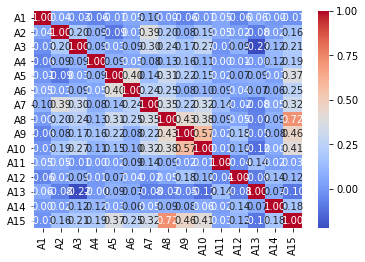

In [4]:
g = sns.heatmap(df.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

In [5]:
X, y = df.iloc[:,:-1], df.iloc[:,-1] #Split Dependent / Independent
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, 
                                                    shuffle = True, random_state = 123) #Train Test Split


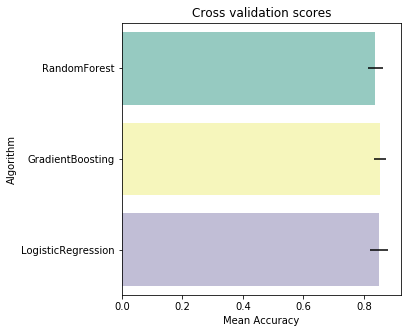

In [13]:
import seaborn as sns
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=5)

# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(LogisticRegression(random_state = random_state))

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":[
"RandomForest","GradientBoosting","LogisticRegression"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [24]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 6, verbose = 0)
gsRFC.fit(X_train,y_train)
#RFC_best = gsRFC.best_estimator_


# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 6, verbose = 0)
gsGBC.fit(X_train,y_train)
#GBC_best = gsGBC.best_estimator_

#Sklearn Logit Regression
LR = LogisticRegression()
LR_param_grid = {
    'penalty' : ['l1', 'l2']}

gsLR = GridSearchCV(LR, param_grid=LR_param_grid, cv=kfold, scoring="accuracy", n_jobs=6, verbose=0)
gsLR.fit(X_train,y_train)
#LR_best = gsLR.best_estimator_


# Best score
print("RF Best Score: {0:.2f} %".format(gsRFC.best_score_ *100))
print("GBC Best Score: {0:.2f} %".format(gsGBC.best_score_ *100))
print("Logit Best Score: {0:.2f} %".format(gsLR.best_score_ *100))


RF Best Score: 87.64 %
GBC Best Score: 87.45 %
Logit Best Score: 85.24 %


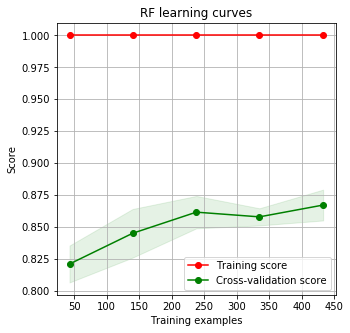

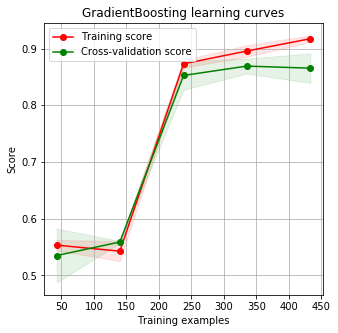

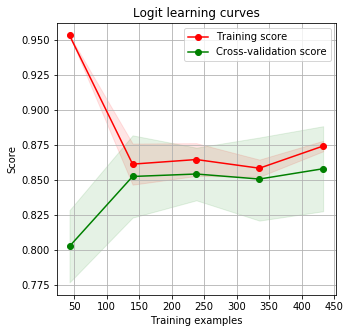

In [15]:
g = plot_learning_curve(gsRFC.best_estimator_,"RF learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsLR.best_estimator_,"Logit learning curves",X_train,y_train,cv=kfold)

### Deep Learning 
Building an MLP 

In [11]:
##Using Heaton's Utils
#Built in OHE of explanatory
#!pip install requests
#Use this if we want to OHE dependent var
from heaton_utils import *
X, y = to_xy(df, 'A15')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, 
                                                   shuffle = True, random_state = 123) #Train Test Split

data = [X_train, X_test, y_train, y_test]
data_list = ["X_train", "X_test", "y_train", "y_test"]
for i in range(4):
    print(data_list[i], "Shape:")
    print(data[i].shape)



X_train Shape:
(552, 14)
X_test Shape:
(138, 14)
y_train Shape:
(552, 2)
y_test Shape:
(138, 2)


In [34]:
def model(x_train, y_train, x_val, y_val, params):

    # next we can build the model exactly like we would normally do it
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1],
                    activation=params['activation'],
                    kernel_initializer='normal'))
    
    model.add(Dropout(params['dropout']))
    
    # if we want to also test for number of layers and shapes, that's possible
    hidden_layers(model, params, 1)
   
    # then we finish again with completely standard Keras way
    model.add(Dense(2, activation=params['last_activation'],
                    kernel_initializer='normal'))
    
    model.compile(loss=params['losses'],
                  # here we add a regulizer normalization function from Talos
                  optimizer=params['optimizer'](lr=lr_normalizer(params['lr'],params['optimizer'])),
                  metrics=['acc', fmeasure])
    
    history = model.fit(X_train, y_train, 
                        validation_split= VALIDATION_SPLIT,
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        verbose=1,
                        callbacks=[PlotLossesKeras()]
                       )
    
    return history, model

# then we can go ahead and set the parameter space
p = {'lr': (0.5, 5, 10),
     'first_neuron':[4, 8, 16, 32, 64],
     'hidden_layers':[0, 1, 2],
     'batch_size': (2, 30, 10),
     'epochs': [150],
     'dropout': (0, 0.5, 5),
     'weight_regulizer':[None],
     'emb_output_dims': [None],
     'shape':['brick','long_funnel'],
     'optimizer': [Adam, SGD, RMSprop],
     'losses': [binary_crossentropy],
     'activation':['relu', 'elu'],
'last_activation': ['sigmoid']}



In [2]:
#!pip install talos
import talos as ta

In [37]:


t = ta.Scan(x=x,
            y=y,
            model=breast_cancer_model,
            grid_downsample=0.01, 
            params=p,
            dataset_name='breast_cancer',
experiment_no='1')

  Using cached https://files.pythonhosted.org/packages/eb/b7/4a5ae8f5fb745109a9425c4118c449447c8119ded7b401c655e86def677a/matplotlib-2.2.3-cp37-cp37m-win_amd64.whl
  Found existing installation: matplotlib 3.0.3
    Uninstalling matplotlib-3.0.3:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\envs\\tf_gpu\\lib\\site-packages\\__pycache__\\pylab.cpython-37.pyc'
Consider using the `--user` option or check the permissions.



ModuleNotFoundError: No module named 'talos'

In [13]:
model = Sequential()
model.add(Dense(5000, input_shape=(14,)))
model.add(Activation('relu')) 
model.add(Dropout(0.5))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(BatchNormalization())
model.add(Dense(2500))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dropout(.5))
model.add(BatchNormalization())
#model.add(Dense(52))
#model.add(Activation('relu'))
#model.add(Dropout(0.3))
#model.add(BatchNormalization())
#model.add(Dense(52))
#model.add(Activation('relu'))
#model.add(Dense(16))
#model.add(Activation('relu'))
#model.add(Dense(8))
#model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('sigmoid')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that i

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 5000)              75000     
_________________________________________________________________
activation_17 (Activation)   (None, 5000)              0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 5000)              0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 5000)              20000     
_________________________________________________________________
dense_18 (Dense)             (None, 2500)              12502500  
_________________________________________________________________
activation_18 (Activation)   (None, 2500)              0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 2500)              0         
__________

KeyboardInterrupt: 

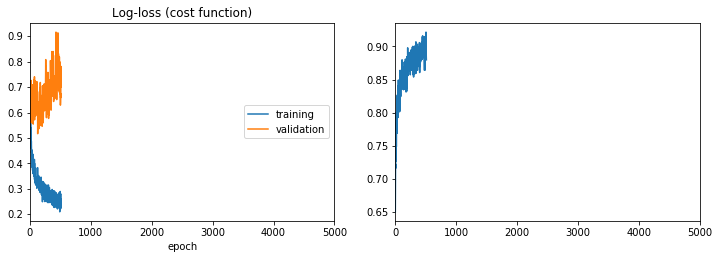

In [14]:
NB_EPOCH = 5000
BATCH_SIZE = 128
VERBOSE = 1 #This sets Verbose to true meaning that logging output will be displayed on screen. Verbose = 0 is default and does allow model to run faster.
NB_CLASSES = 2
#OPTIMIZER = SGD() #Could also use Adam or RMSprop here.
OPTIMIZER = adam(lr = .001)
VALIDATION_SPLIT = .2

with tf.device('/gpu:0'):
    model.compile(loss = 'binary_crossentropy', optimizer= OPTIMIZER, metrics=['accuracy'])
    sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True, log_device_placement=True))
    history = model.fit(X_train, y_train, batch_size= BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE,\
                            validation_split= VALIDATION_SPLIT, callbacks=[PlotLossesKeras()])